In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, plot_confusion_matrix

In [4]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [5]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
print(f"Data Frame Size: {data.shape}")

Data Frame Size: (10000, 12)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

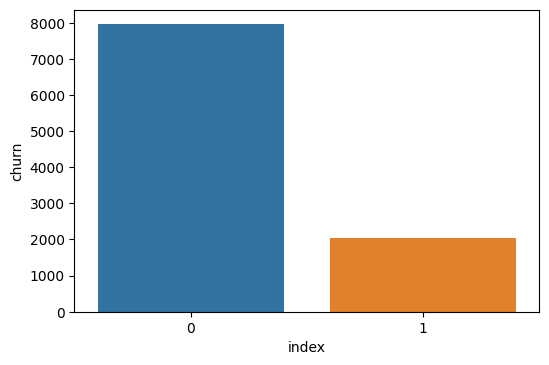

In [10]:
target = (
    data
    .churn
    .value_counts()
    .reset_index()
)

plt.figure(dpi=100)

sns.barplot(x='index', y='churn', data=target)

<Figure size 900x600 with 0 Axes>

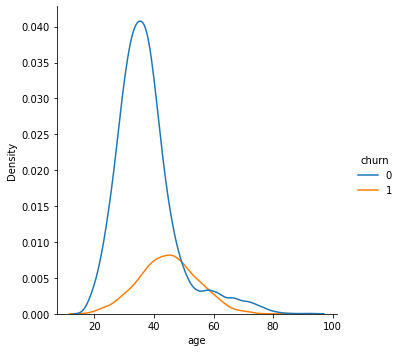

In [11]:
plt.figure(dpi=150)
sns.displot(data=data, x='age', hue='churn', kind='kde')

<Figure size 900x600 with 0 Axes>

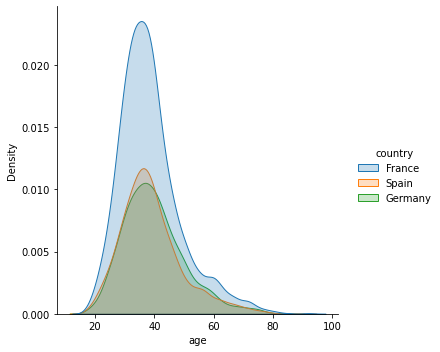

In [75]:
plt.figure(dpi=150)
sns.displot(data=data, x='age', hue='country', kind='kde', fill=True)

   churn  country  count
0      0   France   4204
1      0    Spain   2064
2      0  Germany   1695
3      1  Germany    814
4      1   France    810
5      1    Spain    413
-0.2 4204.0
0.8 2064.0
1.8 1695.0
0.2 810.0
1.2 413.0
2.2 814.0


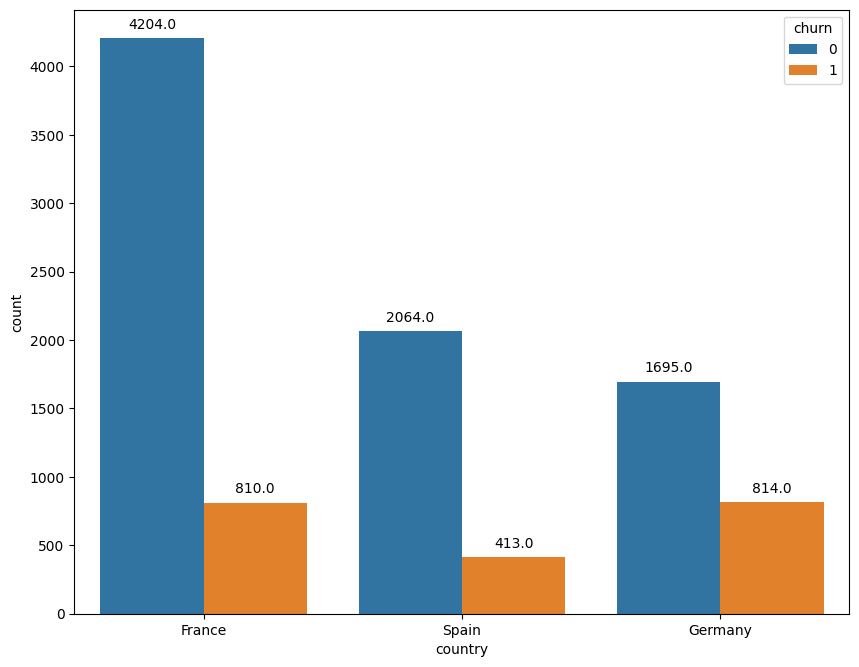

In [51]:
country_churn = (data
                .groupby(['churn'])['country']
                .value_counts()
                .rename('count')
                .reset_index())

print(country_churn)

plt.figure(figsize=(10, 8), dpi=100)

ax = sns.barplot(data=country_churn, x='country', y='count', hue='churn')

for p in ax.patches:
  count = f"{p.get_height()}"

  print(p.get_x() + p.get_width() / 2., p.get_height())
  ax.annotate(
      count,
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center',
      va='center',
      xytext=(0, 10),
      textcoords="offset points"
  )

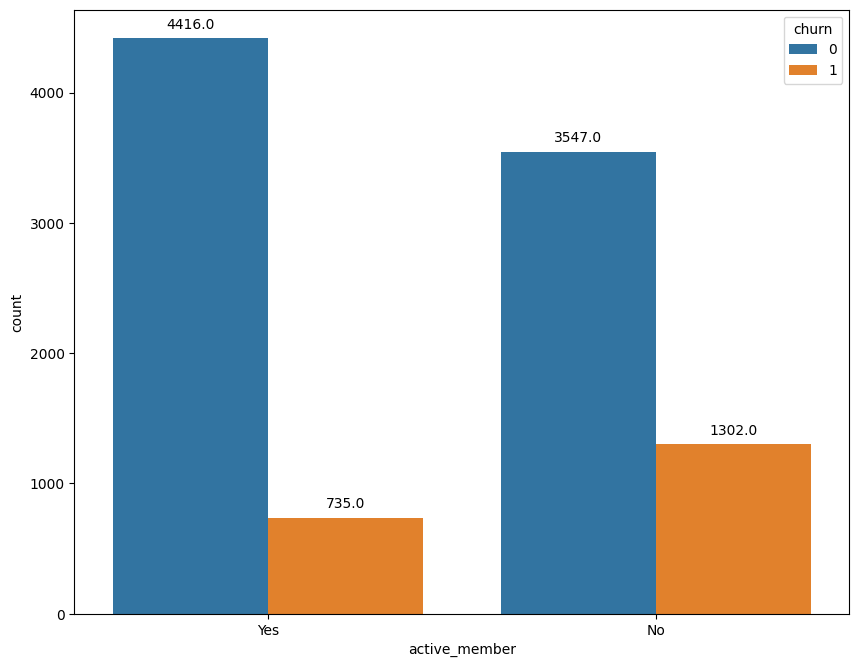

In [74]:
active_members = (
    data.groupby(['churn'])['active_member'].value_counts().rename('count').reset_index()
    
)

print()

plt.figure(figsize=(10, 8), dpi=100)

ax = sns.barplot(data=active_members, x=active_members['active_member'].map({0: 'No', 1 : 'Yes'}), y='count', hue='churn')

for p in ax.patches:
  count = f"{p.get_height()}"
  ax.annotate(
      count,
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center',
      va='center',
      xytext=(0, 10),
      textcoords="offset points"
  )

11.58


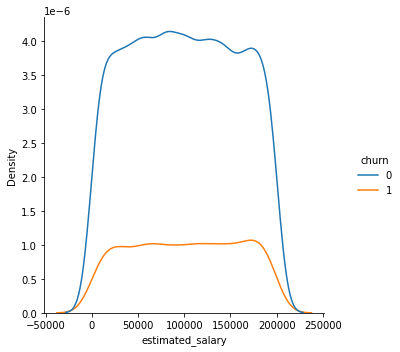

In [94]:
sns.displot(data=data, x=data.estimated_salary.sort_values(), kind='kde', hue='churn')

print(data.estimated_salary.min())

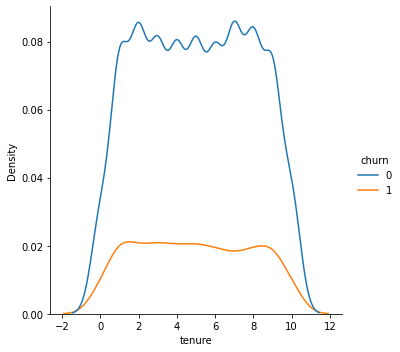

In [95]:
sns.displot(data=data, x=data.tenure.sort_values(), kind='kde', hue='churn')

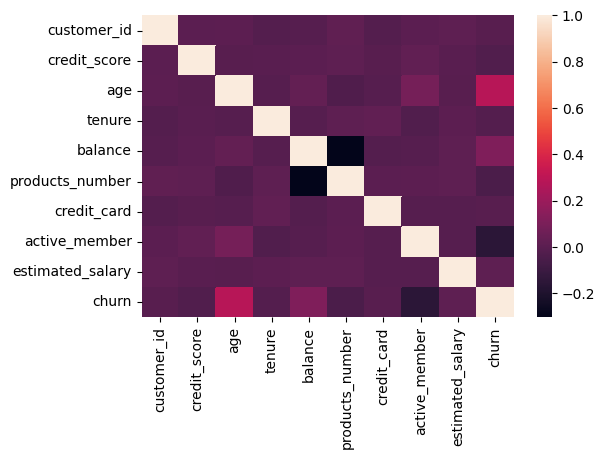

In [97]:
plt.figure(dpi=100)
sns.heatmap(data=data.corr())

In [99]:
data = pd.get_dummies(data)

In [101]:
data = data.drop('customer_id', axis=1)

In [103]:
X = data.drop('churn', axis=1)
y = data['churn']

In [105]:
sc = StandardScaler()

In [108]:
X = sc.fit_transform(X)

In [109]:
X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [112]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       809
           1       0.50      0.19      0.28       191

    accuracy                           0.81      1000
   macro avg       0.67      0.57      0.58      1000
weighted avg       0.77      0.81      0.77      1000



In [113]:
grid_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.1, 1, 3, 5, 7],
    'max_iter': np.linspace(1, 100, 10)
}

In [116]:
lr_grid = LogisticRegression()

In [117]:
grid = GridSearchCV(lr_grid, grid_params, verbose=2)

In [118]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END ..................C=0.001, max_iter=1.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, max_iter=1.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, max_iter=1.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, max_iter=1.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, max_iter=1.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, max_iter=1.0, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, max_iter=1.0, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, max_iter=1.0, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, max_iter=1.0, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, max_iter=1.0, penalty=l2; total time=   0.0s
[CV] END ..........C=0.001, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, max_iter=1.0, pena

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END .................C=0.001, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .................C=0.001, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .................C=0.001, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .................C=0.001, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .........C=0.001, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .........C=0.001, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .........C=0.001, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .........C=0.001, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .........C=0.001, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .................C=0.001, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .................C=0.001, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .................C=0.001, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .................C=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ....................C=0.1, max_iter=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, max_iter=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, max_iter=1.0, penalty=l2; total time=   0.0s
[CV] END ............C=0.1, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=0.1, max_iter=12.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.1, max_iter=12.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.1, max_iter=12.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.1, max_iter=12.0, penalty=l1; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END .....................C=1, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .....................C=1, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .....................C=1, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .....................C=1, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .....................C=1, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .............C=1, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .............C=1, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .............C=1, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .............C=1, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .............C=1, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .....................C=1, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .....................C=1, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ..............C=3, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ..............C=3, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ..............C=3, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ..............C=3, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ..............C=3, max_iter=1.0, penalty=elasticnet; total time=   0.0s
[CV] END .....................C=3, max_iter=12.0, penalty=l1; total time=   0.0s
[CV] END .....................C=3, max_iter=12.0, penalty=l1; total time=   0.0s
[CV] END .....................C=3, max_iter=12.0, penalty=l1; total time=   0.0s
[CV] END .....................C=3, max_iter=12.0, penalty=l1; total time=   0.0s
[CV] END .....................C=3, max_iter=12.0, penalty=l1; total time=   0.0s
[CV] END .....................C=3, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .....................C=3, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .....................C=5, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .....................C=5, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .....................C=5, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .....................C=5, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .....................C=5, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .....................C=5, max_iter=23.0, penalty=l2; total time=   0.0s
[CV] END .....................C=5, max_iter=23.0, penalty=l2; total time=   0.0s
[CV] END .....................C=5, max_iter=23.0, penalty=l2; total time=   0.0s
[CV] END .....................C=5, max_iter=23.0, penalty=l2; total time=   0.0s
[CV] END .....................C=5, max_iter=23.0, penalty=l2; total time=   0.0s
[CV] END .............C=5, max_iter=23.0, penalty=elasticnet; total time=   0.0s
[CV] END .............C=5, max_iter=23.0, penalty=elasticnet; total time=   0.0s
[CV] END .............C=5, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END .....................C=7, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .....................C=7, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .....................C=7, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .....................C=7, max_iter=12.0, penalty=l2; total time=   0.0s
[CV] END .............C=7, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .............C=7, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .............C=7, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .............C=7, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .............C=7, max_iter=12.0, penalty=elasticnet; total time=   0.0s
[CV] END .....................C=7, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .....................C=7, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END .....................C=7, max_iter=23.0, penalty=l1; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 3, 5, 7],
                         'max_iter': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [119]:
grid.best_estimator_

LogisticRegression(C=0.1, max_iter=12.0)

In [122]:
final_lr = LogisticRegression(penalty='l2', C=0.1, max_iter=12.0)

In [125]:
def get_model_preds(model):
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  print(classification_report(y_test, preds))

In [123]:
final_lr.fit(X_train, y_train)

preds = lr.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       809
           1       0.50      0.19      0.28       191

    accuracy                           0.81      1000
   macro avg       0.67      0.57      0.58      1000
weighted avg       0.77      0.81      0.77      1000



In [124]:
svc = SVC()

In [126]:
get_model_preds(svc)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       809
           1       0.79      0.39      0.52       191

    accuracy                           0.86      1000
   macro avg       0.83      0.68      0.72      1000
weighted avg       0.85      0.86      0.84      1000



In [133]:
grid_params = {
    'C': [0.01, 0.1, 1, 3, 5],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['auto'],
    'degree': [1, 3, 5, 7]
}

In [130]:
svc_grid = SVC()

In [135]:
grid = GridSearchCV(svc_grid, grid_params, verbose=2)

In [136]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..........C=0.01, degree=1, gamma=auto, kernel=poly; total time=   1.1s
[CV] END ..........C=0.01, degree=1, gamma=auto, kernel=poly; total time=   1.0s
[CV] END ..........C=0.01, degree=1, gamma=auto, kernel=poly; total time=   1.0s
[CV] END ..........C=0.01, degree=1, gamma=auto, kernel=poly; total time=   1.0s
[CV] END ..........C=0.01, degree=1, gamma=auto, kernel=poly; total time=   1.0s
[CV] END ...........C=0.01, degree=1, gamma=auto, kernel=rbf; total time=   1.8s
[CV] END ...........C=0.01, degree=1, gamma=auto, kernel=rbf; total time=   1.8s
[CV] END ...........C=0.01, degree=1, gamma=auto, kernel=rbf; total time=   1.8s
[CV] END ...........C=0.01, degree=1, gamma=auto, kernel=rbf; total time=   1.8s
[CV] END ...........C=0.01, degree=1, gamma=auto, kernel=rbf; total time=   1.8s
[CV] END .......C=0.01, degree=1, gamma=auto, kernel=sigmoid; total time=   2.8s
[CV] END .......C=0.01, degree=1, gamma=auto, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 3, 5], 'degree': [1, 3, 5, 7],
                         'gamma': ['auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=2)

In [138]:
grid.best_params_

{'C': 5, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}

In [139]:
final_svc = SVC(C=5, degree=3, gamma='auto', kernel='poly')

In [140]:
get_model_preds(final_svc)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       809
           1       0.78      0.38      0.51       191

    accuracy                           0.86      1000
   macro avg       0.83      0.68      0.71      1000
weighted avg       0.85      0.86      0.84      1000



In [141]:
KNN = KNeighborsClassifier()

In [142]:
get_model_preds(KNN)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       809
           1       0.61      0.42      0.50       191

    accuracy                           0.84      1000
   macro avg       0.74      0.68      0.70      1000
weighted avg       0.82      0.84      0.83      1000



In [148]:
grid_params = {
    'n_neighbors': [3, 5, 7, 9],
}

In [150]:
knn_grid = KNeighborsClassifier()

In [151]:
grid = GridSearchCV(knn_grid, grid_params, verbose=2)

In [152]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=7; total time=   0.2s
[CV] END ......................................n_

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, verbose=2)

In [153]:
grid.best_params_

{'n_neighbors': 7}

In [154]:
final_knn = KNeighborsClassifier(n_neighbors=7)

In [155]:
get_model_preds(final_knn)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       809
           1       0.62      0.39      0.48       191

    accuracy                           0.84      1000
   macro avg       0.74      0.67      0.69      1000
weighted avg       0.82      0.84      0.82      1000



In [156]:
rfc = RandomForestClassifier()

In [157]:
get_model_preds(rfc)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       809
           1       0.76      0.49      0.60       191

    accuracy                           0.87      1000
   macro avg       0.82      0.73      0.76      1000
weighted avg       0.86      0.87      0.86      1000



In [158]:
rfc_grid = RandomForestClassifier()

In [159]:
grid_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'bootstrap': [True, False]
}

In [160]:
grid = GridSearchCV(rfc_grid, grid_params, verbose=2)

In [161]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .......bootstrap=True, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END .......bootstrap=True, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END .......bootstrap=True, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END .......bootstrap=True, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END .......bootstrap=True, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=150; total time=   0.6s
[CV] END ......bootstrap=True, max_depth=3, n_es

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [162]:
grid.best_params_

{'bootstrap': False, 'max_depth': 7, 'n_estimators': 150}

In [163]:
final_rfc = RandomForestClassifier(n_estimators=150, bootstrap=False, max_depth=7)

In [164]:
get_model_preds(final_rfc)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       809
           1       0.76      0.39      0.52       191

    accuracy                           0.86      1000
   macro avg       0.81      0.68      0.72      1000
weighted avg       0.85      0.86      0.84      1000



In [165]:
from joblib import load, dump

In [166]:
dump(final_svc, 'svc_model.joblib')

['svc_model.joblib']